In [33]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc

Text(0.5, 0, 'Photon Energy (eV)')

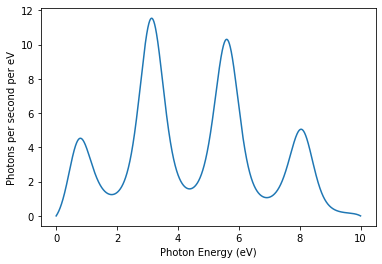

In [34]:
#1,2
xmin = 0
xmax = 10
x = np.linspace(0,10,1000000)

alpha = 2.7

def n(x):
    
    r = alpha*x*(1-x/xmax)*np.exp(-x/xmax+np.sin(8*np.pi*(x/xmax)))
    return r

plt.plot(x,n(x))
plt.ylabel("Photons per second per eV")
plt.xlabel("Photon Energy (eV)")

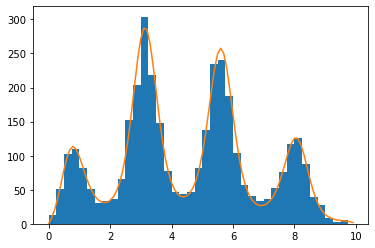

In [35]:
#3,4
#nphot = 12000 #because 120*100
t = 100
#m = 0
#n = len(n(x))

#current stdev/sqrt(n)

def get_photons(t,x,xmax,fbig):
    tries = 120*t
    nphot = tries
    fBig = 12
    x, y = np.random.rand(2,nphot)
    x *= xmax
    y *= fBig
    inside = n(x)>y
    xArray = np.arange(0.,xmax,xmax/100)

    
    func = n(xArray)
    nAcc = []
    for i in range(nphot):
        if inside[i]:
            #color[i]='green'
            nAcc.append(x[i])
            
    XAcc = len(nAcc)        

    integral = XAcc/nphot*fBig*xmax; 
    func = n(xArray)
    
    return (nAcc,integral)
#print(nphot)
xArray = np.arange(0.,xmax,xmax/100)
func = n(xArray)
#nphot = get_photons(t)
# acceptance rejection method
#xMax = 10.
#nDarts = 1000

# check which darts are below the curve - accept those
#inside = n(x)>y
#color = ['red']*nphot
# xAcc =[]
# for i in range(nphot):
#     if inside[i]:
#         color[i]='green'
#         xAcc.append(x[i])
# nAcc = len(xAcc)        

# integral = nAcc/nphot*fBig*xmax; 

# xArray = np.arange(0.,xmax,xmax/100)
# func = n(xArray)

fbig = 12
nAcc, integral = get_photons(t,x,xmax,fbig)


plt.hist(nAcc,bins=np.arange(0.,xmax,xmax/40));

# to compare to pdf need to normalize function using approximate integral
plt.plot(xArray,func/integral*len(nAcc)*xmax/40)

scale the number of events with the area of the box that is 12 by 10 to get the right value for the integral 

In [36]:
#5
A = len(nAcc)/12000
#current stdev/sqrt(n)

mean = np.mean(nAcc)
stddev = np.std(nAcc)
length = len(nAcc)
expectedStd = stddev/np.sqrt(length)
#stdevnumberofphot = np.sqrt(length)
stdevnumberofphot = np.sqrt(length*(1-A))

print('The total number of photons produced was',length)
print('The mean of the energy is', mean.round(2))

print('The standard deviation of the energy is', stddev.round(2))

print('The expected standard deviation of the energy is', expectedStd.round(3))
print('Diviation on number of photons', stdevnumberofphot)

The total number of photons produced was 3517
The mean of the energy is 4.49
The standard deviation of the energy is 2.24
The expected standard deviation of the energy is 0.038
Diviation on number of photons 49.86206891682962


In [37]:
#getphot100 = get_photons(t,x,xmax,fbig)
hundred_phot = []
counts = []
#6
for i in range(100):
    nAcc, integral = get_photons(t,x,xmax,fbig)
    hundred_phot.append(np.mean(nAcc))
    #counts.append(len(nAcc))
    
mean100 = np.mean(hundred_phot)
stddev2 = np.std(hundred_phot)
length2 = len(hundred_phot)

#print('The total number of photons after 100 runs is', length2)
print('The mean after 100 runs is', mean100.round(4))
print('The standard diviation after 100 runs is', stddev2.round(4))

The mean after 100 runs is 4.475
The standard diviation after 100 runs is 0.0383


In [38]:
percentdiffM = ((mean100 - mean)/mean)*100
percentdiffS = ((stddev2 - stddev)/stddev)*100

print('the percent difference in th mean is',percentdiffM)
print('the percent difference in the stddev is',percentdiffS)

the percent difference in th mean is -0.36324378952804337
the percent difference in the stddev is -98.28944508256873


In [39]:

print('it can be seen that the mean stays almost the same but the standard deviation greatly decreases')
print('The expected standard diviation in part 5 was a good predition for the stdev in part 6')

it can be seen that the mean stays almost the same but the standard deviation greatly decreases
The expected standard diviation in part 5 was a good predition for the stdev in part 6
